In [13]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

df = pd.read_csv('emails.csv')

df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Project 1

In [14]:
print("Spam Emails: " + str(len(df.loc[df.spam==1])))
print("Non-spam Emails: " + str(len(df.loc[df.spam==0])))
print(df.shape)

df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text', 'spam']]

print(df.shape)

Spam Emails: 1368
Non-spam Emails: 4360
(5728, 2)
(5695, 2)


In [15]:
clean_desc = []

for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    desc = re.sub("(\\d|\\W)+", " ", desc)
    
    clean_desc.append(desc)
    
df['text'] = clean_desc
df.head(3)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1


In [17]:
stop_words = stopwords.words('english')
stop_words += ['re', 'new', 'subject']

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

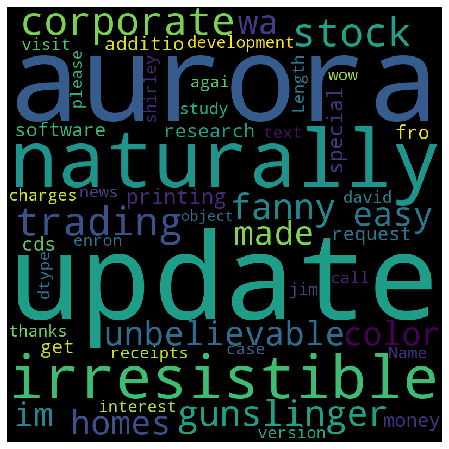

In [21]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(df['text']))

fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

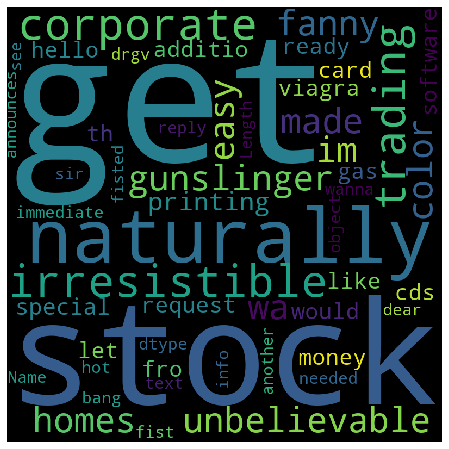

In [22]:
wordcloudSpam = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(df.loc[df.spam==1]['text']))

fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloudSpam)
plt.axis('off')
plt.show()

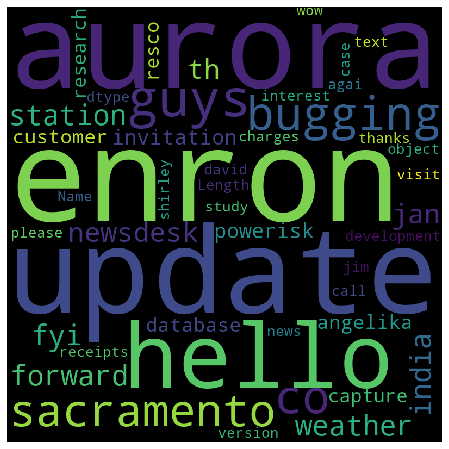

In [23]:
wordcloudNonSpam = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, min_font_size = 20).generate(str(df.loc[df.spam==0]['text']))

fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloudNonSpam)
plt.axis('off')
plt.show()

# Project 2

In [24]:
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, accuracy_score

In [25]:
text = ["the dog is white", "the cat is black", "the cat and the dog are friends"]

cv = CountVectorizer()

cv.fit(text)

print(cv.vocabulary_)

vector = cv.transform(text)

print(vector.toarray())

{'the': 7, 'dog': 4, 'is': 6, 'white': 8, 'cat': 3, 'black': 2, 'and': 0, 'are': 1, 'friends': 5}
[[0 0 0 0 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0]
 [1 1 0 1 1 1 0 2 0]]


In [27]:
text_vec = CountVectorizer().fit_transform(df['text'])

X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.45, random_state = 42, shuffle = True)

In [28]:
classifier = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.5, max_depth = 6)

In [29]:
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1926
           1       0.98      0.91      0.94       637

    accuracy                           0.97      2563
   macro avg       0.98      0.95      0.96      2563
weighted avg       0.97      0.97      0.97      2563



# Project 3

In [34]:
import textblob
from textblob import TextBlob

In [35]:
blob = TextBlob("This is a good example of a TextBlob")
print(blob.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)


In [36]:
email_blob = [TextBlob(text) for text in df['text']]

df['tb_Pol'] = [b.sentiment.polarity for b in email_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in email_blob]

df.head(10)

,text,spam,tb_Pol,tb_Subj
0,subject naturally irresistible your corporate ...,1,0.296607,0.546905
1,subject the stock trading gunslinger fanny is ...,1,0.160317,0.562698
2,subject unbelievable new homes made easy im wa...,1,0.040229,0.480581
3,subject color printing special request additio...,1,0.163492,0.468254
4,subject do not have money get software cds fro...,1,0.433333,0.395833
5,subject great nnews hello welcome to medzonlin...,1,0.361905,0.690476
6,subject here s a hot play in motion homeland s...,1,0.100542,0.469126
7,subject save your money buy getting this thing...,1,0.263810,0.483810
8,subject undeliverable home based business for ...,1,-0.011667,0.423333
9,subject save your money buy getting this thing...,1,0.263810,0.483810
